ANALISIS EXPLORATORIO DE DATOS 

Dataset en csv con la informacion de los clientes y variables 

In [1]:
import pandas as pd

#Cargar la infrormación de los archivos sin procesar
df= pd.read_csv(r'C:\Users\DPEREZ\Downloads\Customer Variables.csv')
df .head(-10)

,NOMBRE,Nit,02.Ultimo Contrato (Recencia),02. R Value (Recencia),03.F value (Frequencia),03.M Value (Valor Monetario),01.Visitas Completadas,Fact Total,02. Contratos Nuevos,Equipos Activos,01.Meses Activo,Sector,Tamaño,DiasPago,Productosadquiridos,length factor
0,Aligo Defensores Informáticos S.A.S,900284772-0,2025-05-13 00:00:00,20.0,59.0,$237297,23.0,$2557469368,$14000512,24.0,125,SERVICIOS,70,36.512925,4.0,3772.0
1,Tecnas S.A. Bic,800011002-4,2025-05-21 00:00:00,12.0,147.0,$761994,21.0,$14643372667,$112013073,301.0,125,ALIMENTOS,602,50.852789,4.0,3757.0
2,Enfoque Agencia Promotora De Seguros Ltda,900105212-1,2025-04-14 00:00:00,49.0,60.0,$350785,10.0,$801466497,$21047128,31.0,125,SERVICIOS,51,16.948267,4.0,3742.0
3,Empresa Para La Seguridad Y Soluciones Urbanas...,890984761-8,2025-05-16 00:00:00,17.0,89.0,$2461501,112.0,$11589912295,$219073556,72.0,125,SERVICIOS,230,23.317989,3.0,3713.0
4,Emtelco S.A.S,800237456-5,2025-05-21 00:00:00,12.0,739.0,$571519,95.0,$46845601610,$422352243,1867.0,125,SERVICIOS,13867,52.710196,3.0,3705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,Union Israelita De Beneficencia De Medellin,890902916-1,NaN,NaN,NaN,NaN,11.0,$9597739,NaN,NaN,45,EDUCACION,85,37.625000,1.0,NaN
775,Universidad De Ibague,890704382-1,NaN,NaN,NaN,NaN,3.0,$64827392,NaN,NaN,48,EDUCACION,500,30.100000,2.0,NaN
776,Vesalius Pharma S.A.S,830062860-4,NaN,NaN,NaN,NaN,9.0,$80465366,NaN,NaN,39,INDUSTRIA,0,6.142857,1.0,NaN
777,Virtualsoft Servicios & Software S.A.S.,901307208-2,NaN,NaN,NaN,NaN,30.0,$986135448,NaN,128.0,38,SERVICIOS,128,26.508427,2.0,NaN


In [2]:
df.columns

Index(['NOMBRE', 'Nit', '02.Ultimo Contrato (Recencia)',
       '02. R Value (Recencia)', '03.F value (Frequencia)',
       '03.M Value (Valor Monetario)', '01.Visitas Completadas', 'Fact Total',
       '02. Contratos Nuevos', 'Equipos Activos', '01.Meses Activo', 'Sector',
       'Tamaño', 'DiasPago', 'Productosadquiridos', 'length factor'],
      dtype='object')

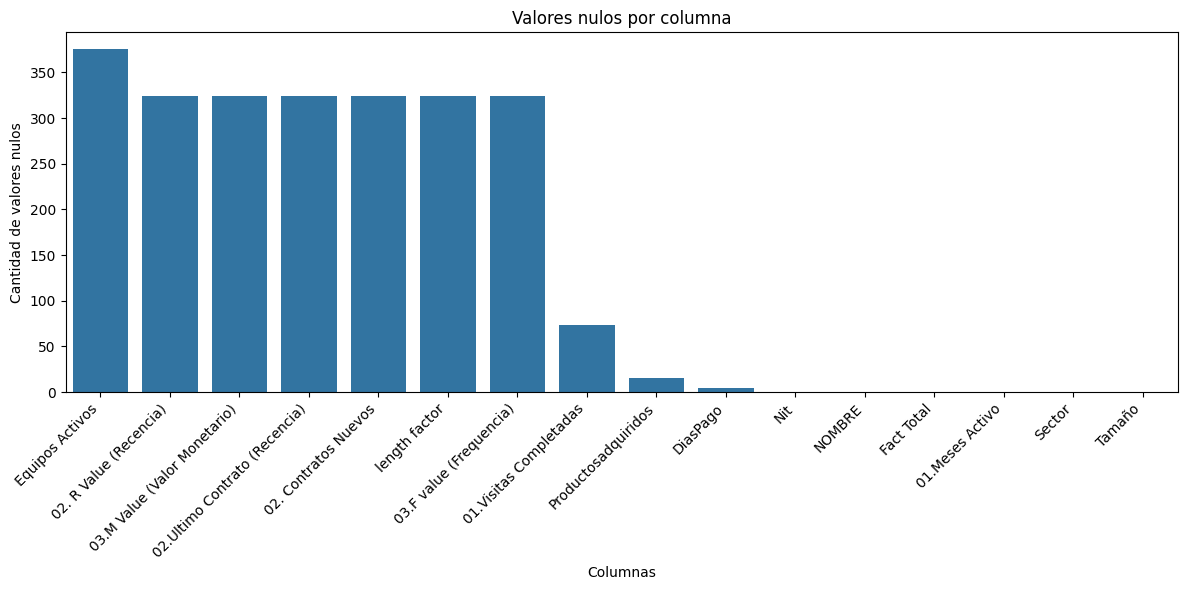

In [3]:
import seaborn as sns


df['02.Ultimo Contrato (Recencia)'] = pd.to_datetime(df['02.Ultimo Contrato (Recencia)'])

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
null_counts = df.isnull().sum().sort_values(ascending=False)
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Valores nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.tight_layout()
plt.show()


In [4]:
columnas = ['Fact Total', '02. Contratos Nuevos','03.M Value (Valor Monetario)']
for col in columnas:
    df[col] = df[col].replace({r'\$': '', ',': ''}, regex=True).astype(float)

df.dtypes

NOMBRE                                   object
Nit                                      object
02.Ultimo Contrato (Recencia)    datetime64[ns]
02. R Value (Recencia)                  float64
03.F value (Frequencia)                 float64
03.M Value (Valor Monetario)            float64
01.Visitas Completadas                  float64
Fact Total                              float64
02. Contratos Nuevos                    float64
Equipos Activos                         float64
01.Meses Activo                           int64
Sector                                   object
Tamaño                                    int64
DiasPago                                float64
Productosadquiridos                     float64
length factor                           float64
dtype: object

In [5]:
#Filtrar df 

df = df[~df['02.Ultimo Contrato (Recencia)'].isnull()]



In [6]:
df.isnull().sum().sort_values(ascending=False)

Equipos Activos                  122
01.Visitas Completadas            24
02.Ultimo Contrato (Recencia)      0
NOMBRE                             0
02. R Value (Recencia)             0
03.F value (Frequencia)            0
03.M Value (Valor Monetario)       0
Nit                                0
Fact Total                         0
02. Contratos Nuevos               0
01.Meses Activo                    0
Sector                             0
Tamaño                             0
DiasPago                           0
Productosadquiridos                0
length factor                      0
dtype: int64

In [7]:
#Reemplazmos los vaciós por 0 , reglas de negocio


df['01.Visitas Completadas' ]=df['01.Visitas Completadas'].fillna(0)
df['Equipos Activos'] = df['Equipos Activos'].fillna(0)

df.isnull().sum().sort_values(ascending=False)

NOMBRE                           0
Nit                              0
02.Ultimo Contrato (Recencia)    0
02. R Value (Recencia)           0
03.F value (Frequencia)          0
03.M Value (Valor Monetario)     0
01.Visitas Completadas           0
Fact Total                       0
02. Contratos Nuevos             0
Equipos Activos                  0
01.Meses Activo                  0
Sector                           0
Tamaño                           0
DiasPago                         0
Productosadquiridos              0
length factor                    0
dtype: int64

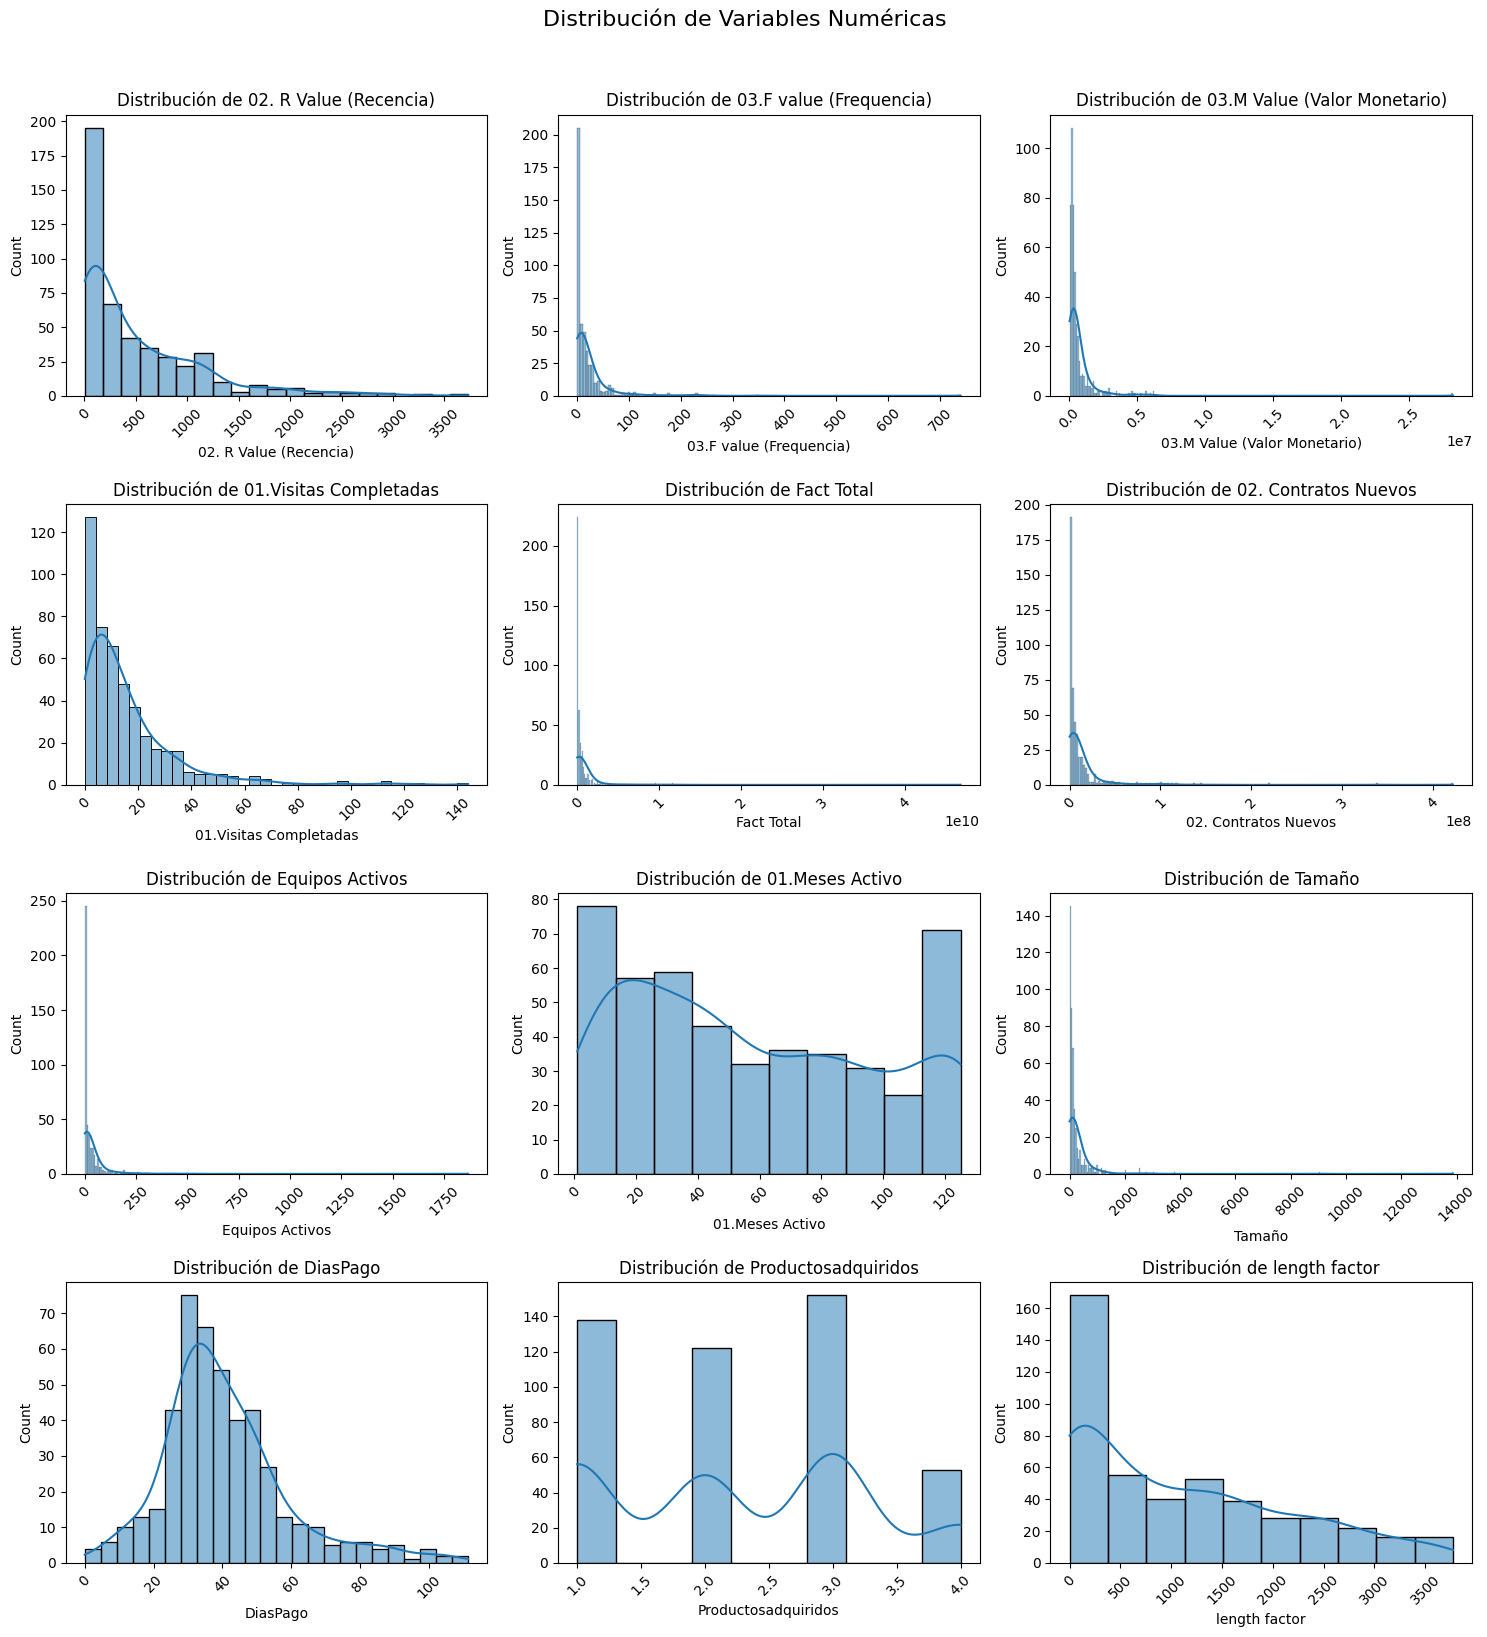

In [8]:
# Get numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate number of rows and columns for subplots
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
fig.suptitle('Distribución de Variables Numéricas', y=1.02, fontsize=16)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Create histograms
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribución de {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots if any
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


#matriz de correlacion



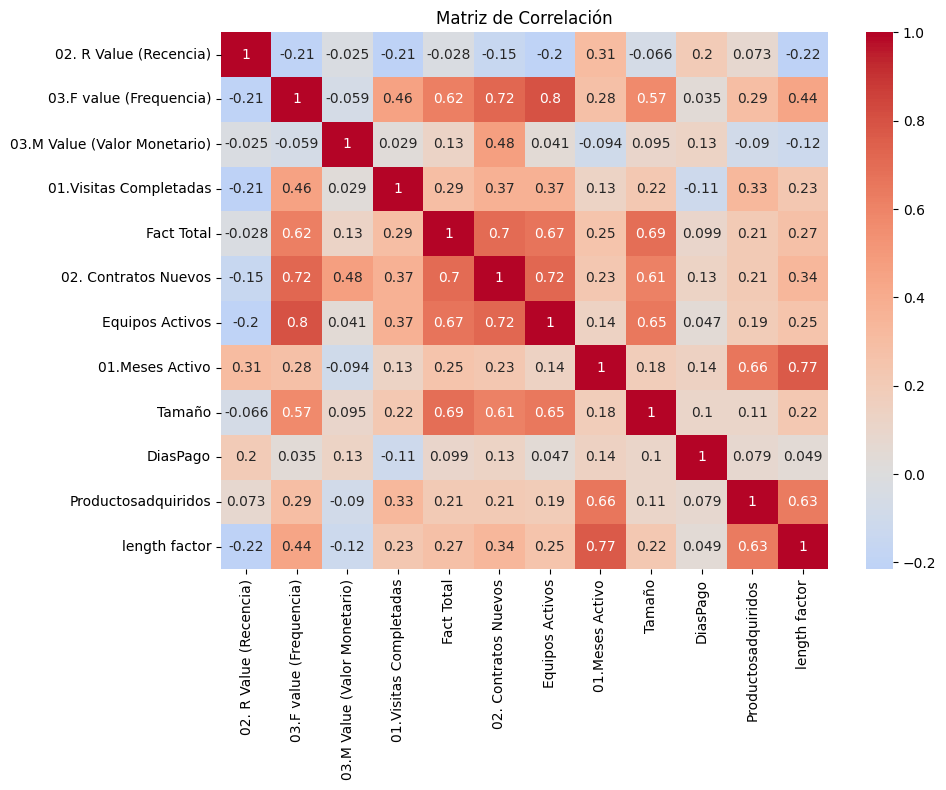

In [9]:
#matrix de correlacion

plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

NORMALIZACION CON LOGARITMO

In [12]:
import numpy as np
df[numeric_cols] = df[numeric_cols].apply(lambda x: np.log1p(x))

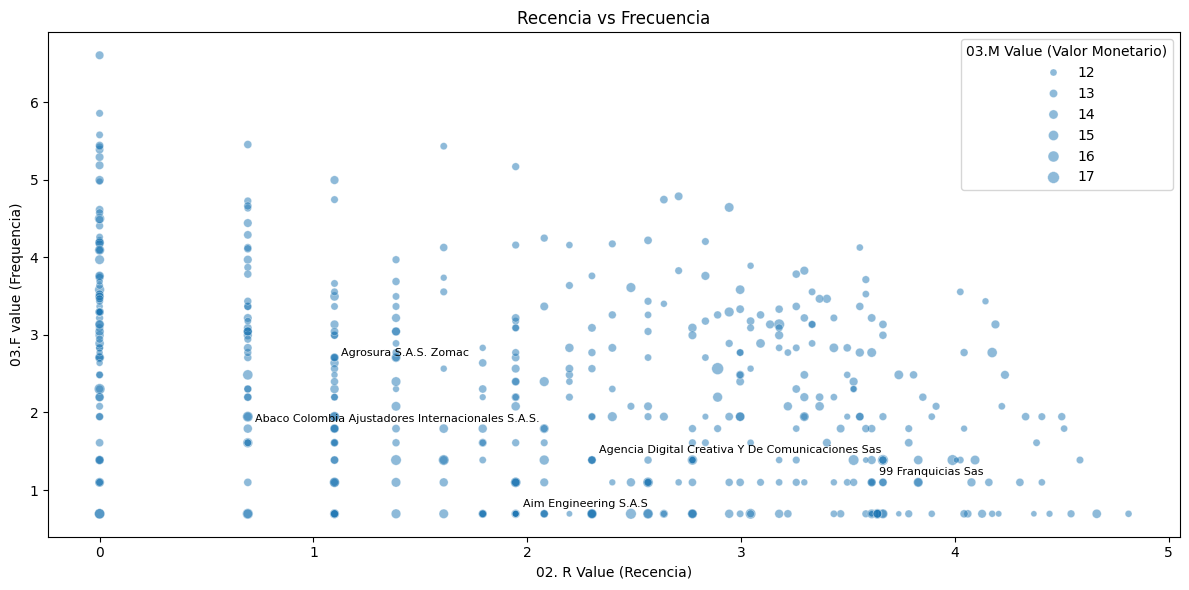

In [13]:

#escalar con logaritmo las variables numéricas
import matplotlib.pyplot as 	plt
# Graficar Recencia vs Frecuencia
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='02. R Value (Recencia)', y='03.F value (Frequencia)', 
				size=df['03.M Value (Valor Monetario)'],
				alpha=0.5, s=100)
plt.title('Recencia vs Frecuencia')

# Annotate selected points (you can adjust the number of points to label)
for idx, row in df.head(5).iterrows():  # Annotating first 5 points as example
	plt.annotate(row['NOMBRE'], 
				(row['02. R Value (Recencia)'], row['03.F value (Frequencia)']),
				xytext=(5, 5), textcoords='offset points',
				fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
#Guardar el DataFrame en un archivo CSV
import os

# Ruta relativa: salir de Notebooks y entrar a Data
ruta_csv = '../Data/Data.csv'

# Verificar que la carpeta padre/Data existe
carpeta_data = '../Data'
if not os.path.exists(carpeta_data):
    os.makedirs(carpeta_data)
    print("Carpeta 'Data' creada")

# Guardar el DataFrame
df.to_csv(ruta_csv, index=False)

# Alternativa con ruta absoluta (más robusta):
# import os
# directorio_actual = os.getcwd()
# directorio_padre = os.path.dirname(directorio_actual)
# ruta_absoluta = os.path.join(directorio_padre, 'Data', 'Data.csv')
# df.to_csv(ruta_absoluta, index=False)

print(f"DataFrame guardado exitosamente en {ruta_csv}")

# Verificar que el archivo se guardó
if os.path.exists(ruta_csv):
    print("✓ Archivo confirmado en la ubicación correcta")
else:
    print("✗ Error: No se pudo confirmar la ubicación del archivo")

DataFrame guardado exitosamente en ../Data/Data.csv
✓ Archivo confirmado en la ubicación correcta
